In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

from utils import gaussian_profile, z_statistic, s_statistic, performance_sims

In [2]:
save_figs = True
sess_name = 'sims_1'

In [3]:
# Parameters
sess_name = "sims_1"


In [4]:
with open('%s.json' % sess_name) as f:
    param_dict = json.load(f)
globals().update(param_dict)

In [5]:
np.random.seed(seed)

q = np.array([n/2, n/2])
x0_r, y0_r = (q + np.array(Delta))
x0_n, y0_n = (q - np.array(Delta))

P_r = gaussian_profile(n/2, n/2, [n, n], cxx_r, cyy_r, cth_r)
P_n = gaussian_profile(n/2, n/2, [n, n], cxx_n, cyy_n, cth_n)
T_P_r = alpha_r * gaussian_profile(x0_r, y0_r, [n, n], cxx_r, cyy_r, cth_r)
T_P_n = alpha_n * gaussian_profile(x0_n, y0_n, [n, n], cxx_n, cyy_n, cth_n)

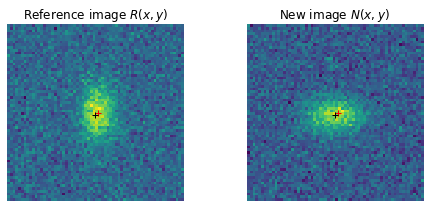

In [6]:
R = T_P_r + np.random.randn(n, n)*sig_r
N = T_P_n + np.random.randn(n, n)*sig_n

plt.figure(figsize=(7, 3))
plt.subplot(1,2,1)
plt.imshow(R)
plt.plot(x0_r, y0_r, '+r')
plt.plot(x0_n, y0_n, '+k')
plt.title(r'Reference image $R(x,y)$')

plt.axis('off')
plt.subplot(1,2,2); plt.imshow(N)
plt.axis('off')
plt.plot(x0_r, y0_r, '+r')
plt.plot(x0_n, y0_n, '+k')
plt.title(r'New image $N(x,y)$')

plt.tight_layout()

if save_figs:
    plt.savefig('figures/stamps_%s.pdf' % (sess_name))

In [7]:
z_pos, z_neg, s_pos, s_neg = performance_sims(P_r, P_n, T_P_r, T_P_n, sig_r, sig_n, 1)

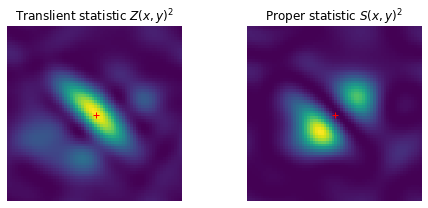

In [8]:
plt.figure(figsize=(7, 3))
plt.subplot(1,2,1)
plt.imshow(z_pos[:, :, 0])
plt.plot(q[0], q[1], '+r')
plt.title(r'Translient statistic $Z(x,y)^2$');

plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(s_pos[:, :, 0])
plt.axis('off')
plt.plot(q[0], q[1], '+r')
plt.title(r'Proper statistic $S(x,y)^2$');

plt.tight_layout()

if save_figs:
    plt.savefig('figures/residuals_pos_%s.pdf' % (sess_name))

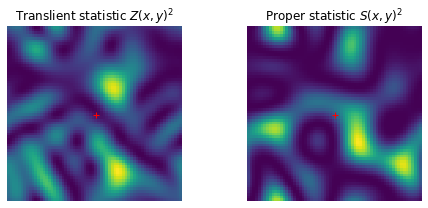

In [9]:
plt.figure(figsize=(7, 3))
plt.subplot(1,2,1)
plt.imshow(z_neg[:, :, 0])
plt.plot(q[0], q[1], '+r')
plt.title(r'Translient statistic $Z(x,y)^2$');

plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(s_neg[:, :, 0])
plt.axis('off')
plt.plot(q[0], q[1], '+r')
plt.title(r'Proper statistic $S(x,y)^2$');

plt.tight_layout()

if save_figs:
    plt.savefig('figures/residuals_neg_%s.pdf' % (sess_name))